In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
Lslack = 0.223;
Umax = 0.04
Lceopt = 0.093;
width = 0.63*Lceopt
Fmax = 7400
a = 0.25*Fmax
b = 0.25*10*Lceopt

Lce = 0.087
t = 0
tend = 2.99
h = 0.001
i = 1
data = np.zeros((int(tend/h)+3, 2))

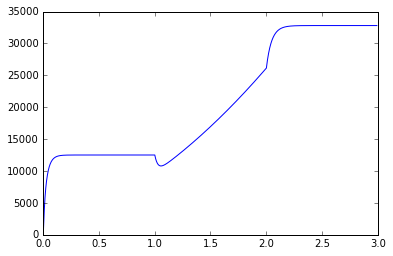

In [19]:
while t < tend :
    if t <= 1:
        Lm = 0.31
    if t > 1 and t < 2 :
        Lm = 0.31 - 0.04*(t-1)
    Lsee = Lm - Lce
    if Lsee < Lslack :
        F = 0
    else :
        F = Fmax*((Lsee-Lslack)/(Umax*Lslack))**2
    if Lce < Lceopt :
        Fkpe = 0
    else :
        Fkpe = Fmax*((Lce-Lceopt)/(Umax*Lceopt))**2
    F0 = max(0, (Fmax*(1-(Lce-Lceopt)/width)**2)) 
    if (F - Fkpe) > F0 :
        print("Error")
    Lcedot = -b*(F0-(F-Fkpe))/(F+a-Fkpe)
    Lce = Lce + h*Lcedot
    t = t + h
    i = i + 1
    data[i,0] = t
    data[i,1] = F - Fkpe

plt.plot(data[:,0], data[:,1])